#  Regresión Lineal uso de Framework + Análisis

Se importan las librerías que se planean utilizar para la implementación y evaluación del modelo.

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (14, 6)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Lectura de los datos sobre el PIB de Estados Unidos (desde 1947 hasta 2020), se toman solo los primeros datos de cada año, estos hacen referencia al primer trimestre del año.

In [2]:
datos=pd.read_csv("GDP.csv")
for i in range(len(datos)):
    datos['DATE'][i]=datos['DATE'][i][0:4]
datos = datos.drop_duplicates(subset=['DATE'])
datos['DATE']=pd.to_numeric(datos['DATE'], errors='coerce')
datos.head()

c:\users\mariana\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,GDP
0,1947,243.164
4,1948,265.742
8,1949,275.034
12,1950,280.828
16,1951,336.000


Gráficas comportamiento de los datos.

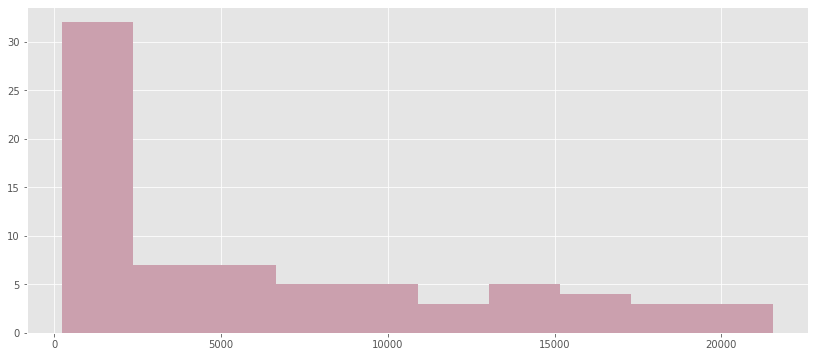

In [3]:
datos['GDP'].hist(color='#CBA0AE')
plt.show()

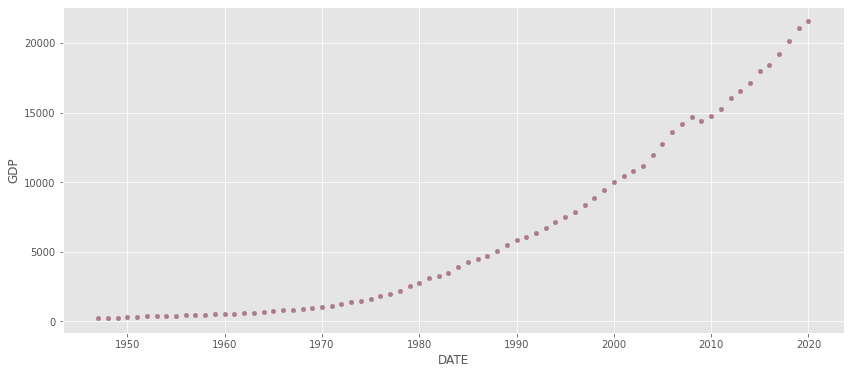

In [5]:
datos.plot.scatter(x='DATE',y='GDP',c='#AC7D88')
plt.show()

Separación de datos en Variable dependiente y Variable(s) predictora(s)

In [6]:
X=datos['DATE'].values.reshape(-1,1)
y=datos['GDP'].values
X.shape, y.shape

((74, 1), (74,))

Separación de las variables en entrenamiento y prueba

In [7]:
X_train=X[0:60]
X_test=X[60:]
y_train=y[0:60]
y_test=y[60:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60, 1), (60,), (14, 1), (14,))

Entrenamiento del modelo utilizando las funciones importadas, adicional se implementan técnicas de evaluación del modelo.

In [10]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Coeficiente X_1: \n', regr.coef_)
print('Intercepto: \n', regr.intercept_)
y_pred=regr.predict(X_train)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coeficiente X_1: 
 [203.43249222]
Intercepto: 
 -398350.82422295096
Mean squared error: 2198834.08
Variance score: 0.85


Gráfico del modelo que se genera con la regresión lineal

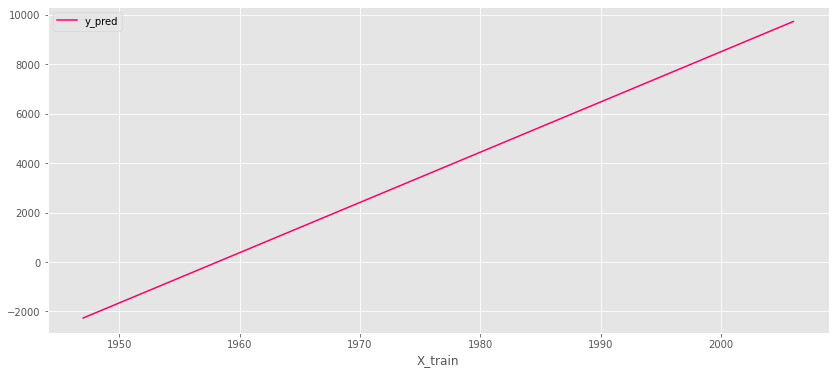

In [12]:
y_pred = regr.predict(X_train)
d = {'X_train': X_train.reshape(60), 'y_pred': y_pred, 'y_train': y_train}
datos_pred=pd.DataFrame(data=d)
datos_pred.plot.line(x='X_train',y='y_pred',c='#FF0063')
plt.show()

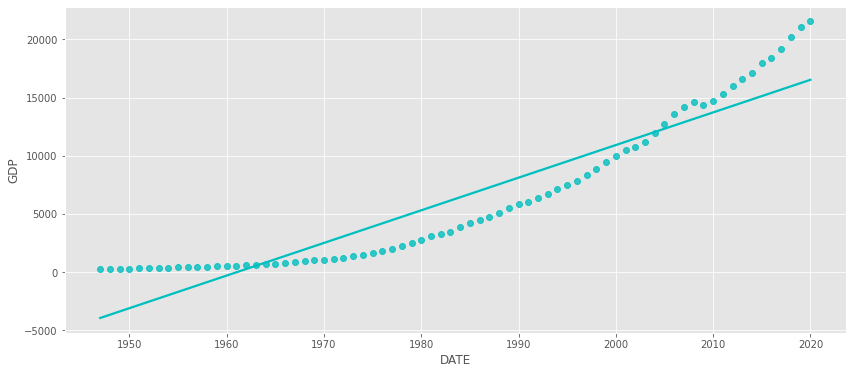

In [25]:
import seaborn as sns
sns.regplot(data=datos, x='DATE', y='GDP', ci=None, color='c')
plt.show()

In [26]:
datos.describe()

,DATE,GDP
count,74.000000,74.000000
mean,1983.500000,6288.724365
std,21.505813,6443.777922
min,1947.000000,243.164000
25%,1965.250000,737.276000
50%,1983.500000,3690.733500
75%,2001.750000,10709.933750
max,2020.000000,21539.689000


Metricas datos de entrenamiento y datos de prueba

In [29]:
y_pred = regr.predict(X_train)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Mean squared error: 2198834.08
Variance score: 0.85


In [30]:
y_pred = regr.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 38462555.38
Variance score: -5.43


Mejoras en el modelo

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Coeficiente X_1: \n', regr.coef_)
print('Intercepto: \n', regr.intercept_)
y_pred=regr.predict(X_train)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coeficiente X_1: 
 [280.4304114]
Intercepto: 
 -549983.9514857067
Mean squared error: 4951297.24
Variance score: 0.88
